## Exploratory Data Analysis (EDA)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
df = pd.read_csv('BTC-Daily.csv')

### Basic Info of Dateset

In [12]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


None

In [13]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


In [14]:
# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"\nRow Duplicated: {duplicates}")


Row Duplicated: 0


In [15]:
# Summary Statistics (Raw Prices)
print("\n--- Summary Statistics (Raw Data) ---")
print(df[['open', 'high', 'low', 'close', 'Volume USD']].describe())


--- Summary Statistics (Raw Data) ---
               open          high           low         close    Volume USD
count   2651.000000   2651.000000   2651.000000   2651.000000  2.651000e+03
mean   11693.189332  12038.562912  11296.539461  11709.326213  6.099369e+07
std    16272.554746  16739.237000  15718.297511  16282.908704  1.072838e+08
min      162.000000    212.840000    152.400000    162.000000  0.000000e+00
25%      654.680000    664.460000    640.050000    654.370000  9.516170e+03
50%     6408.950000   6540.000000   6312.000000   6407.770000  2.288982e+07
75%    10708.620000  10956.240000  10303.755000  10726.425000  8.018383e+07
max    67547.490000  69000.000000  66250.000000  67559.000000  1.446125e+09


### Time-Series Trend Analysis

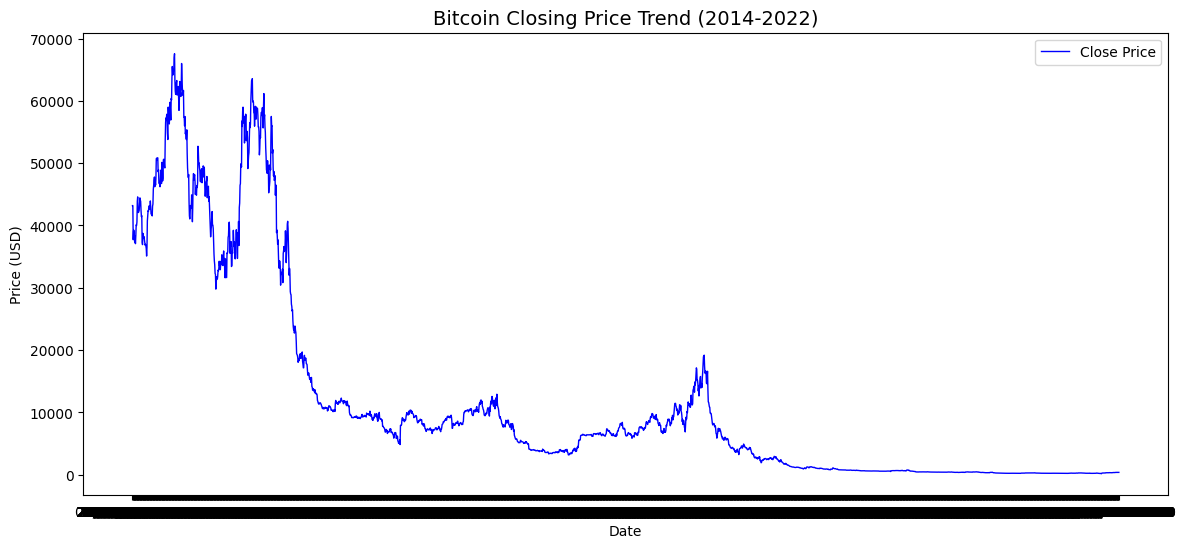

In [16]:
# Plot 1: Closing Price Trend
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1)
plt.title('Bitcoin Closing Price Trend (2014-2022)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [17]:
# Load the dataset
df_clean = pd.read_csv('BTC_Cleaned_Data.csv')

### Target Variable Analysis

Bullish Days: 1408 (53.11%)
Bearish Days: 1214 (45.79%)


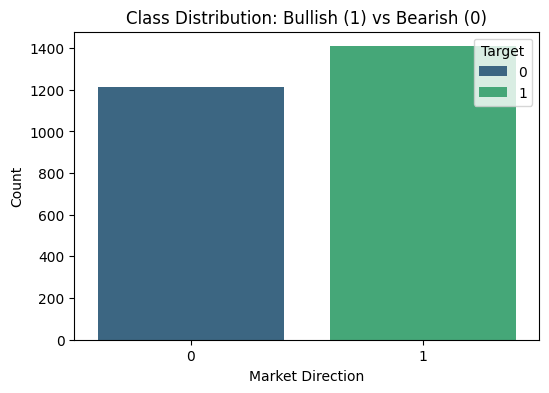

In [19]:
# Plot 3: Target Class Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df_clean, hue = 'Target', palette='viridis')
plt.title('Class Distribution: Bullish (1) vs Bearish (0)', fontsize=12)
plt.xlabel('Market Direction')
plt.ylabel('Count')
# Add labels
bullish_count = df_clean['Target'].value_counts()[1]
bearish_count = df_clean['Target'].value_counts()[0]
print(f"Bullish Days: {bullish_count} ({(bullish_count/len(df))*100:.2f}%)")
print(f"Bearish Days: {bearish_count} ({(bearish_count/len(df))*100:.2f}%)")
plt.show()

### Market Stability Analysis

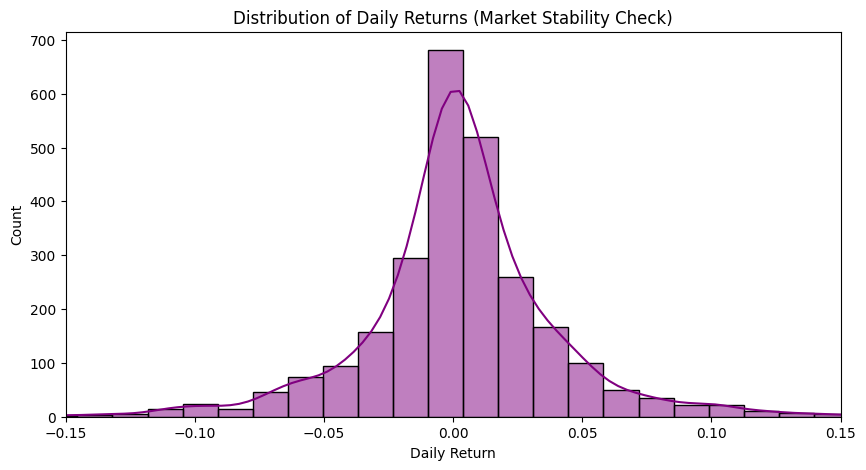

In [21]:
# Plot 4: Feature Distribution (Daily Returns)
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Daily_Return'], bins=50, kde=True, color='purple') # type: ignore
plt.title('Distribution of Daily Returns (Market Stability Check)', fontsize=12)
plt.xlabel('Daily Return')
plt.xlim(-0.15, 0.15) # Zoom in to ignore extreme outlier wicks
plt.show()

### Bivariate Analysis

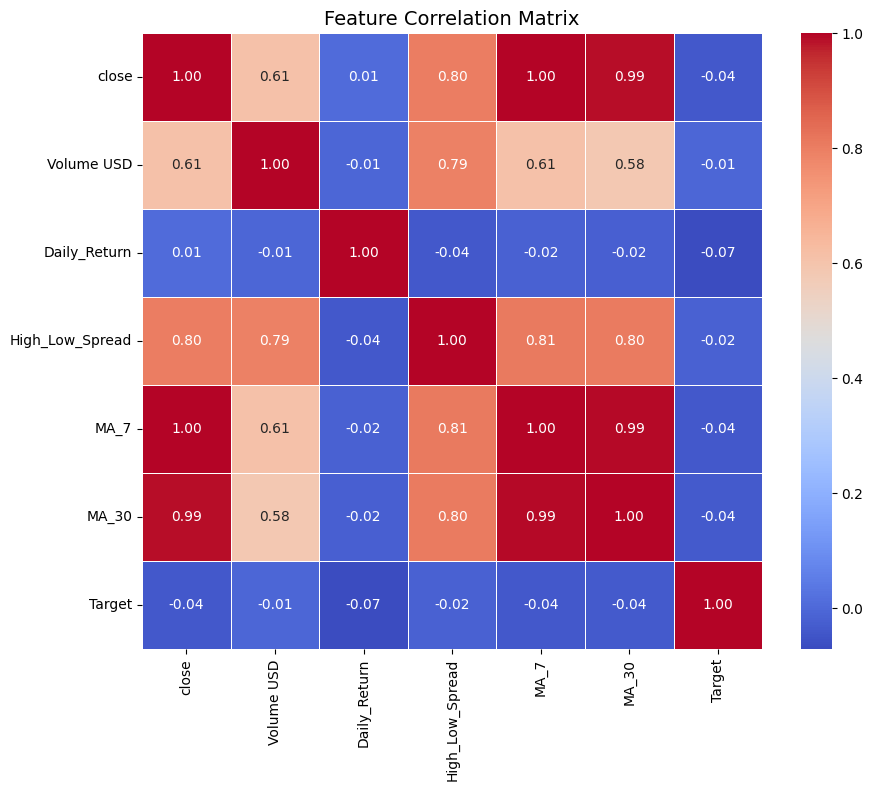

In [22]:
# Plot 5: Correlation Heatmap
# Select only numerical features relevant for correlation
corr_features = ['close', 'Volume USD', 'Daily_Return', 'High_Low_Spread', 'MA_7' ,'MA_30', 'Target']
corr_matrix = df_clean[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

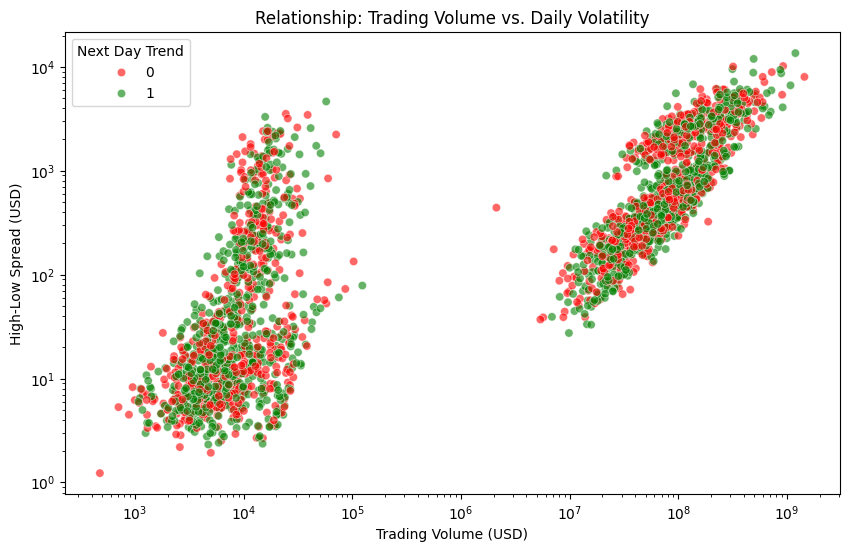

In [23]:
# Plot 6: Volume vs Volatility Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume USD', y='High_Low_Spread', hue='Target', data=df_clean, alpha=0.6, palette={0: 'red', 1: 'green'})
plt.title('Relationship: Trading Volume vs. Daily Volatility', fontsize=12)
plt.xlabel('Trading Volume (USD)')
plt.ylabel('High-Low Spread (USD)')
plt.xscale('log') # Log scale because volume is massive
plt.yscale('log') # Log scale for spread to see patterns better
plt.legend(title='Next Day Trend')
plt.show()